In [54]:
# Import libraries

import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Combining all the excel files of different countries and adding it to excel_list

path = r"D:\Job Fair Project\Sports Analytics\DataSet" 
file_list = glob.glob(path + r"/*.xlsx")
excl_list = []
for file in file_list:
    excl_list.append(pd.read_excel(file))

In [4]:
#concatenating all the excel files to a single data frame

df = pd.concat(excl_list, ignore_index=True)

In [5]:
df

,PlayerName,PersonDetail,Links,Stats,TopStats
0,Abdul Hadi,"{'Full Name': 'Abdul Hadi', 'Born': 'March 22,...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
1,Abdul Malik,"{'Full Name': 'Abdul Malik', 'Born': 'March 11...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
2,Abdul Rashid Khan Naseri,"{'Full Name': 'Abdul Rashid Khan Naseri', 'Bor...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
3,Abdul Rahman Rahmani,"{'Full Name': 'Abdul Rahman Rahmani', 'Born': ...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
4,Abdul Wasi Noori,"{'Full Name': 'Abdul Wasi Noori', 'Born': 'Jul...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
...,...,...,...,...,...
3977,Mazvita Zambuko,"{'Full Name': 'Mazvita Zambuko', 'Born': 'Marc...",https://www.espncricinfo.com/cricketers/mazvit...,{'Career Averages': {'Unnamed: 0': {0: 'overvi...,{}
3978,Cephas Zhuwao,"{'Full Name': 'Cephas Zhuwao', 'Born': 'Decemb...",https://www.espncricinfo.com/cricketers/cephas...,{'Career Averages': {'Unnamed: 0': {0: 'overvi...,"{'Batting & Fielding': {'Format': {0: 'ODIs', ..."
3979,Peacemore Zimwa,"{'Full Name': 'Peacemore Zimwa', 'Born': 'Apri...",https://www.espncricinfo.com/cricketers/peacem...,{'Career Averages': {'Unnamed: 0': {0: 'overvi...,{}
3980,Daniel Takudzwa Zvidzai,"{'Full Name': 'Daniel Takudzwa Zvidzai', 'Born...",https://www.espncricinfo.com/cricketers/daniel...,{},"{'Batting & Fielding': {'Format': {0: 'FC', 1:..."


In [6]:
df.head()

,PlayerName,PersonDetail,Links,Stats,TopStats
0,Abdul Hadi,"{'Full Name': 'Abdul Hadi', 'Born': 'March 22,...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
1,Abdul Malik,"{'Full Name': 'Abdul Malik', 'Born': 'March 11...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
2,Abdul Rashid Khan Naseri,"{'Full Name': 'Abdul Rashid Khan Naseri', 'Bor...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
3,Abdul Rahman Rahmani,"{'Full Name': 'Abdul Rahman Rahmani', 'Born': ...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN
4,Abdul Wasi Noori,"{'Full Name': 'Abdul Wasi Noori', 'Born': 'Jul...",https://www.espncricinfo.com/cricketers/abdul-...,-,NaN


## Extracting info from Personal Details column

In [7]:
# Creating a separate dataframe with Personal details column

df1 = df['PersonDetail']
import ast
dict_list = []
for i in df1:
    res = ast.literal_eval(i)
    dict_list.append(res)

In [8]:
df.columns

Index(['PlayerName', 'PersonDetail', 'Links', 'Stats', 'TopStats'], dtype='object')

# Creating DataFrame of Personal details of players

In [9]:
columns = {'Name':[],'Born':[],'Age':[],'Batting Style':[],'Bowling Style':[],'Playing Role':[],'Teams_playing':[]}

for dic in dict_list:
    columns['Name'].append(dic['Full Name'])
    columns['Born'].append(dic['Born'])
    columns['Age'].append(dic['Age'])
    columns['Batting Style'].append(dic.get('Batting Style'))
    columns['Bowling Style'].append(dic.get('Bowling Style'))
    columns['Playing Role'].append(dic.get('Playing Role'))
    columns['Teams_playing'].append(len(dic['Teams'][0]))
    
person_details = pd.DataFrame(columns)
person_details['PlayerName'] = df['PlayerName']
person_details.head()

,Name,Born,Age,Batting Style,Bowling Style,Playing Role,Teams_playing,PlayerName
0,Abdul Hadi,"March 22, 2005, Kunduz",18y 313d,Left hand Bat,None,None,2,Abdul Hadi
1,Abdul Malik,"March 11, 1998, Baghlan",25y 324d,Right hand Bat,Right arm Offbreak,Opening Batter,2,Abdul Malik
2,Abdul Rashid Khan Naseri,"September 09, 1994, Laghman",29y 142d,Left hand Bat,Slow Left arm Orthodox,None,1,Abdul Rashid Khan Naseri
3,Abdul Rahman Rahmani,"November 22, 2001",22y 68d,Right hand Bat,Right arm Fast medium,Bowler,4,Abdul Rahman Rahmani
4,Abdul Wasi Noori,"July 06, 2002, Baghlan",21y 207d,Right hand Bat,Legbreak,Allrounder,6,Abdul Wasi Noori


In [10]:
person_details

,Name,Born,Age,Batting Style,Bowling Style,Playing Role,Teams_playing,PlayerName
0,Abdul Hadi,"March 22, 2005, Kunduz",18y 313d,Left hand Bat,None,None,2,Abdul Hadi
1,Abdul Malik,"March 11, 1998, Baghlan",25y 324d,Right hand Bat,Right arm Offbreak,Opening Batter,2,Abdul Malik
2,Abdul Rashid Khan Naseri,"September 09, 1994, Laghman",29y 142d,Left hand Bat,Slow Left arm Orthodox,None,1,Abdul Rashid Khan Naseri
3,Abdul Rahman Rahmani,"November 22, 2001",22y 68d,Right hand Bat,Right arm Fast medium,Bowler,4,Abdul Rahman Rahmani
4,Abdul Wasi Noori,"July 06, 2002, Baghlan",21y 207d,Right hand Bat,Legbreak,Allrounder,6,Abdul Wasi Noori
...,...,...,...,...,...,...,...,...
3977,Mazvita Zambuko,"March 31, 1991",32y 320d,Right hand Bat,Right arm Medium,None,1,Mazvita Zambuko
3978,Cephas Zhuwao,"December 15, 1984, Harare",39y 61d,Left hand Bat,Slow Left arm Orthodox,Batter,5,Cephas Zhuwao
3979,Peacemore Zimwa,"April 28, 1993, Mutoko",30y 292d,Right hand Bat,Legbreak,None,1,Peacemore Zimwa
3980,Daniel Takudzwa Zvidzai,"January 03, 1999, Marondera",25y 42d,Right hand Bat,None,None,1,Daniel Takudzwa Zvidzai


In [11]:
person_details.describe()

,Teams_playing
count,3982.00000
mean,5.08011
std,4.99971
min,0.00000
25%,2.00000
50%,3.00000
75%,7.00000
max,51.00000


In [12]:
person_details.dtypes

Name             object
Born             object
Age              object
Batting Style    object
Bowling Style    object
Playing Role     object
Teams_playing     int64
PlayerName       object
dtype: object

In [13]:
person_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           3982 non-null   object
 1   Born           3982 non-null   object
 2   Age            3982 non-null   object
 3   Batting Style  3955 non-null   object
 4   Bowling Style  3354 non-null   object
 5   Playing Role   2260 non-null   object
 6   Teams_playing  3982 non-null   int64 
 7   PlayerName     3982 non-null   object
dtypes: int64(1), object(7)
memory usage: 249.0+ KB


In [14]:
person_details.columns

Index(['Name', 'Born', 'Age', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Teams_playing', 'PlayerName'],
      dtype='object')

## Extracting info from Stats column

In [15]:
# replacing all the '-' in stats column with '{}'
df['Stats'] = df['Stats'].replace('-','{}')

In [16]:
# Creating a new dataframe with stats column

df2 = df['Stats']
dict_list1 = []
for i in df2:
    try:
        res = ast.literal_eval(i)
        dict_list1.append(res)
    except:
        pass

# Creating a stats dataframe

### For-Career-Averages

In [17]:
# Creating a Career averages dataframe from stats column
col = []

for i in dict_list1:
    col.append(i.get('Career Averages'))

In [18]:
columns ={'Mat': [],'Span':[],'Runs': [],'HS': [],'Bat Avg': [],'100s': [],'Wkts': [],'BBI': [],'Bowl Avg': [],'5w': [],'Catches': [],'Stumping': [],'Avg Diff': []}
for i in col:
    if i != None:
        columns['Mat'].append(i['Mat'][0])
        columns['Span'].append(i.get(['Span'][0]))
        columns['Runs'].append(i.get(['Runs'][0]))
        columns['HS'].append(i.get(['HS'][0]))
        columns['Bat Avg'].append(i.get(['Bat Avg'][0]))
        columns['100s'].append(i.get(['100s'][0]))
        columns['Wkts'].append(i.get(['Wkts'][0]))
        columns['BBI'].append(i.get(['BBI'][0]))
        columns['Bowl Avg'].append(i.get(['Bowl Avg'][0]))
        columns['5w'].append(i.get(['5w'][0]))
        columns['Catches'].append(i.get(['Ct'][0]))
        columns['Stumping'].append(i.get(['St'][0]))
        columns['Avg Diff'].append(i.get(['Avg Diff'][0]))
    else:
        columns['Mat'].append(None)
        columns['Span'].append(None)
        columns['Runs'].append(None)
        columns['HS'].append(None)
        columns['Bat Avg'].append(None)
        columns['100s'].append(None)
        columns['Wkts'].append(None)
        columns['BBI'].append(None)
        columns['Bowl Avg'].append(None)
        columns['5w'].append(None)
        columns['Catches'].append(None)
        columns['Stumping'].append(None)
        columns['Avg Diff'].append(None)
        
career_avg = pd.DataFrame(columns)

In [19]:
career_avg

,Mat,Span,Runs,HS,Bat Avg,100s,Wkts,BBI,Bowl Avg,5w,Catches,Stumping,Avg Diff
0,NaN,None,None,None,None,None,None,None,None,None,None,None,None
1,NaN,None,None,None,None,None,None,None,None,None,None,None,None
2,NaN,None,None,None,None,None,None,None,None,None,None,None,None
3,NaN,None,None,None,None,None,None,None,None,None,None,None,None
4,NaN,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,2.0,{0: '2009-2009'},{0: 70},{0: 36},{0: 35.0},{0: 0},{0: 2},{0: '2/42'},{0: 25.0},{0: 0},{0: 1},{0: 0},{0: 10}
3978,7.0,{0: '2008-2018'},{0: 48},{0: 24},{0: 6.85},{0: 0},{0: 1},{0: '1/1'},{0: 1.0},{0: 0},{0: 2},{0: 0},{0: 5.85}
3979,1.0,{0: '2011-2011'},{0: 0},{0: 0},{0: 0.0},{0: 0},{0: 0},{0: '-'},None,{0: 0},{0: 1},{0: 0},None
3980,NaN,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
career_avg.tail()

,Mat,Span,Runs,HS,Bat Avg,100s,Wkts,BBI,Bowl Avg,5w,Catches,Stumping,Avg Diff
3977,2.0,{0: '2009-2009'},{0: 70},{0: 36},{0: 35.0},{0: 0},{0: 2},{0: '2/42'},{0: 25.0},{0: 0},{0: 1},{0: 0},{0: 10}
3978,7.0,{0: '2008-2018'},{0: 48},{0: 24},{0: 6.85},{0: 0},{0: 1},{0: '1/1'},{0: 1.0},{0: 0},{0: 2},{0: 0},{0: 5.85}
3979,1.0,{0: '2011-2011'},{0: 0},{0: 0},{0: 0.0},{0: 0},{0: 0},{0: '-'},None,{0: 0},{0: 1},{0: 0},None
3980,NaN,None,None,None,None,None,None,None,None,None,None,None,None
3981,NaN,None,None,None,None,None,None,None,None,None,None,None,None


In [21]:
career_avg.describe()

,Mat
count,1546.000000
mean,24.783312
std,30.402227
min,0.000000
25%,3.000000
50%,11.000000
75%,36.750000
max,161.000000


In [22]:
career_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mat       1546 non-null   float64
 1   Span      1540 non-null   object 
 2   Runs      1388 non-null   object 
 3   HS        1387 non-null   object 
 4   Bat Avg   1265 non-null   object 
 5   100s      1387 non-null   object 
 6   Wkts      1071 non-null   object 
 7   BBI       1071 non-null   object 
 8   Bowl Avg  920 non-null    object 
 9   5w        1071 non-null   object 
 10  Catches   1536 non-null   object 
 11  Stumping  1536 non-null   object 
 12  Avg Diff  747 non-null    object 
dtypes: float64(1), object(12)
memory usage: 404.6+ KB


In [23]:
career_avg.columns

Index(['Mat', 'Span', 'Runs', 'HS', 'Bat Avg', '100s', 'Wkts', 'BBI',
       'Bowl Avg', '5w', 'Catches', 'Stumping', 'Avg Diff'],
      dtype='object')

## Formatting the career avg columns

In [24]:
# Extracting the values from the data in dictionary format

def form(x):
    if x == None:
        res = None
    else:
        res = x[0]
    return res

In [25]:

# Including all the columns except the Mat (matches) column

format_col = list(career_avg.columns)
format_col.remove('Mat')
for col in format_col:
    career_avg[col] = career_avg[col].apply(form)

# Match Result

In [26]:
# Creating a new dataframe for match result
col2 = []

for i in dict_list1:
    col2.append(i.get('Match Result'))

In [27]:

columns = {'Matches_won':[],'Matches_lost':[]}
for i in col2:
    if i == None:
        columns['Matches_won'].append(None)
        columns['Matches_lost'].append(None)
    
    if i!= None and len(i.get('Unnamed: 0'))==1:
        if i['Unnamed: 0'][0] == 'won match':
            columns['Matches_won'].append(i['Mat'][0])
            columns['Matches_lost'].append(None)
        elif i['Unnamed: 0'][0] == 'lost match':
            columns['Matches_lost'].append(i['Mat'][0])
            columns['Matches_won'].append(None)
        else:
            columns['Matches_lost'].append(None)
            columns['Matches_won'].append(None)
    if i!=None and len(i.get('Unnamed: 0'))>1 :
        if i['Unnamed: 0'][0] == 'won match':
            columns['Matches_won'].append(i['Mat'][0])
        else:
            columns['Matches_won'].append(None)
        if i['Unnamed: 0'][0] == 'lost match':
             columns['Matches_lost'].append(i['Mat'][0])
        elif i['Unnamed: 0'][1] == 'lost match':
            columns['Matches_lost'].append(i['Mat'][1])
        else:
            columns['Matches_lost'].append(None)  
won_lost =pd.DataFrame(columns)


# Concatenating both Dataframes

In [28]:
#Concatenating all the 3 created dataframes

data = pd.concat([person_details,career_avg,won_lost],axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3982 entries, 0 to 3981
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           3982 non-null   object 
 1   Born           3982 non-null   object 
 2   Age            3982 non-null   object 
 3   Batting Style  3955 non-null   object 
 4   Bowling Style  3354 non-null   object 
 5   Playing Role   2260 non-null   object 
 6   Teams_playing  3982 non-null   int64  
 7   PlayerName     3982 non-null   object 
 8   Mat            1546 non-null   float64
 9   Span           1540 non-null   object 
 10  Runs           1388 non-null   float64
 11  HS             1387 non-null   object 
 12  Bat Avg        1265 non-null   float64
 13  100s           1387 non-null   float64
 14  Wkts           1071 non-null   float64
 15  BBI            1071 non-null   object 
 16  Bowl Avg       920 non-null    float64
 17  5w             1071 non-null   float64
 18  Catches 

In [30]:
data.dtypes

Name              object
Born              object
Age               object
Batting Style     object
Bowling Style     object
Playing Role      object
Teams_playing      int64
PlayerName        object
Mat              float64
Span              object
Runs             float64
HS                object
Bat Avg          float64
100s             float64
Wkts             float64
BBI               object
Bowl Avg         float64
5w               float64
Catches          float64
Stumping         float64
Avg Diff         float64
Matches_won      float64
Matches_lost     float64
dtype: object

In [31]:
data.describe()

,Teams_playing,Mat,Runs,Bat Avg,100s,Wkts,Bowl Avg,5w,Catches,Stumping,Avg Diff,Matches_won,Matches_lost
count,3982.00000,1546.000000,1388.000000,1265.000000,1387.000000,1071.000000,920.000000,1071.000000,1536.000000,1536.000000,747.000000,1357.000000,1369.000000
mean,5.08011,24.783312,320.426513,14.970332,0.070656,17.999066,27.863707,0.069094,8.048177,0.660807,-14.251553,14.408990,12.581446
std,4.99971,30.402227,607.344549,10.954405,0.367390,25.684335,15.658650,0.304003,12.320699,3.886524,17.861020,17.337446,14.106611
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-164.610000,1.000000,1.000000
25%,2.00000,3.000000,12.000000,7.000000,0.000000,2.000000,19.302500,0.000000,0.000000,0.000000,-20.285000,2.000000,2.000000
50%,3.00000,11.000000,57.500000,13.000000,0.000000,7.000000,24.000000,0.000000,3.000000,0.000000,-13.200000,7.000000,7.000000
75%,7.00000,36.750000,297.750000,21.180000,0.000000,25.000000,32.000000,0.000000,11.000000,0.000000,-5.515000,20.000000,19.000000
max,51.00000,161.000000,4118.000000,110.500000,5.000000,157.000000,178.000000,3.000000,81.000000,59.000000,93.160000,111.000000,82.000000


In [32]:
data.columns

Index(['Name', 'Born', 'Age', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Teams_playing', 'PlayerName', 'Mat', 'Span', 'Runs', 'HS', 'Bat Avg',
       '100s', 'Wkts', 'BBI', 'Bowl Avg', '5w', 'Catches', 'Stumping',
       'Avg Diff', 'Matches_won', 'Matches_lost'],
      dtype='object')

# Calculating % of Null values in each column

In [33]:
(data.isnull().sum()/len(data))*100

Name              0.000000
Born              0.000000
Age               0.000000
Batting Style     0.678051
Bowling Style    15.770969
Playing Role     43.244601
Teams_playing     0.000000
PlayerName        0.000000
Mat              61.175289
Span             61.325967
Runs             65.143144
HS               65.168257
Bat Avg          68.232044
100s             65.168257
Wkts             73.103968
BBI              73.103968
Bowl Avg         76.896032
5w               73.103968
Catches          61.426419
Stumping         61.426419
Avg Diff         81.240583
Matches_won      65.921647
Matches_lost     65.620291
dtype: float64

In [34]:
# checking for duplicates in the data

data.duplicated().sum()

241

In [35]:
# Dropping the Nullvalues and duplicates 

data.drop_duplicates(inplace=True)
data.dropna(axis=0,inplace=True)

In [36]:
data.describe()

,Teams_playing,Mat,Runs,Bat Avg,100s,Wkts,Bowl Avg,5w,Catches,Stumping,Avg Diff,Matches_won,Matches_lost
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,9.585714,38.198214,365.748214,13.959000,0.066071,27.442857,28.165786,0.114286,11.441071,0.044643,-14.204696,19.466071,17.251786
std,7.176523,33.191131,650.452218,9.383476,0.384297,28.753911,15.336234,0.389224,12.590854,0.775155,17.202562,18.951088,15.519593
min,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-164.610000,1.000000,1.000000
25%,4.000000,12.000000,21.000000,6.717500,0.000000,6.000000,20.100000,0.000000,2.000000,0.000000,-20.185000,5.000000,5.000000
50%,8.000000,28.000000,87.000000,12.125000,0.000000,16.500000,24.455000,0.000000,7.000000,0.000000,-13.030000,14.000000,12.000000
75%,13.000000,56.000000,371.750000,20.020000,0.000000,40.000000,31.262500,0.000000,16.250000,0.000000,-5.097500,27.250000,24.250000
max,51.000000,161.000000,4118.000000,58.000000,5.000000,157.000000,178.000000,3.000000,81.000000,18.000000,26.860000,111.000000,82.000000


In [37]:
data.columns

Index(['Name', 'Born', 'Age', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Teams_playing', 'PlayerName', 'Mat', 'Span', 'Runs', 'HS', 'Bat Avg',
       '100s', 'Wkts', 'BBI', 'Bowl Avg', '5w', 'Catches', 'Stumping',
       'Avg Diff', 'Matches_won', 'Matches_lost'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 18 to 3978
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           560 non-null    object 
 1   Born           560 non-null    object 
 2   Age            560 non-null    object 
 3   Batting Style  560 non-null    object 
 4   Bowling Style  560 non-null    object 
 5   Playing Role   560 non-null    object 
 6   Teams_playing  560 non-null    int64  
 7   PlayerName     560 non-null    object 
 8   Mat            560 non-null    float64
 9   Span           560 non-null    object 
 10  Runs           560 non-null    float64
 11  HS             560 non-null    object 
 12  Bat Avg        560 non-null    float64
 13  100s           560 non-null    float64
 14  Wkts           560 non-null    float64
 15  BBI            560 non-null    object 
 16  Bowl Avg       560 non-null    float64
 17  5w             560 non-null    float64
 18  Catches      

# Formatting age column

In [39]:
# Converting the format from '18y 313d' to '18
def format_age(x): 
    age = int(x.split('y')[0])
    return age
data['Age'] = data['Age'].apply(format_age)

# Formatting Born column

In [40]:
# Converting the format from 'April 28 1993, Mutoko' to '1993-04-28'

from datetime import datetime

def format_Born(x):
    f = x.replace(',','').split()[0:3]
    res = " ".join(f)
    date = datetime.strptime(res, "%B %d %Y")
    return date
data['Born'] = data['Born'].apply(format_Born)

# Formatting HS column

In [41]:
# The High scorew column has Runs with '*' symbol which means not out. Hence creating a new column call out/not_out 

def out(x):
    if '*' in str(x):
        return 'Not Out'
    else:
        return 'Out'
data['HS(out/not_out)'] = data['HS'].apply(out)

In [42]:
# Converting trhe format from '23*' to '23'

def format_hs(x):
    if "*" in str(x):
       x =  str(x).split('*')[0]
    return x
data['HS'] = data['HS'].apply(format_hs)

# Creating new columns with BBI

In [43]:

# creating new wikts and runs columns from BBI columns in the format '3/15'
# Column 1

def bbi(x):
    x = x.split('/')[0]
    return int(x)
data['BBI_wickets'] = data['BBI'].apply(bbi)

# Column 2

def bbi2(x):
    x = x.split('/')[1]
    return int(x)
data['BBI_runs'] = data['BBI'].apply(bbi2)

In [44]:
#dropping the BBI column

data.drop(['BBI'],axis=1,inplace=True)

# Correcting the datatypes

In [45]:
data.dtypes

Name                       object
Born               datetime64[ns]
Age                         int64
Batting Style              object
Bowling Style              object
Playing Role               object
Teams_playing               int64
PlayerName                 object
Mat                       float64
Span                       object
Runs                      float64
HS                         object
Bat Avg                   float64
100s                      float64
Wkts                      float64
Bowl Avg                  float64
5w                        float64
Catches                   float64
Stumping                  float64
Avg Diff                  float64
Matches_won               float64
Matches_lost              float64
HS(out/not_out)            object
BBI_wickets                 int64
BBI_runs                    int64
dtype: object

In [46]:
data.columns

Index(['Name', 'Born', 'Age', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Teams_playing', 'PlayerName', 'Mat', 'Span', 'Runs', 'HS', 'Bat Avg',
       '100s', 'Wkts', 'Bowl Avg', '5w', 'Catches', 'Stumping', 'Avg Diff',
       'Matches_won', 'Matches_lost', 'HS(out/not_out)', 'BBI_wickets',
       'BBI_runs'],
      dtype='object')

In [47]:
data.describe()

,Born,Age,Teams_playing,Mat,Runs,Bat Avg,100s,Wkts,Bowl Avg,5w,Catches,Stumping,Avg Diff,Matches_won,Matches_lost,BBI_wickets,BBI_runs
count,560,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,1992-09-29 05:44:34.285714304,30.878571,9.585714,38.198214,365.748214,13.959000,0.066071,27.442857,28.165786,0.114286,11.441071,0.044643,-14.204696,19.466071,17.251786,2.985714,18.082143
min,1983-02-06 00:00:00,17.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-164.610000,1.000000,1.000000,1.000000,0.000000
25%,1988-04-11 06:00:00,27.000000,4.000000,12.000000,21.000000,6.717500,0.000000,6.000000,20.100000,0.000000,2.000000,0.000000,-20.185000,5.000000,5.000000,2.000000,11.000000
50%,1992-02-12 12:00:00,31.500000,8.000000,28.000000,87.000000,12.125000,0.000000,16.500000,24.455000,0.000000,7.000000,0.000000,-13.030000,14.000000,12.000000,3.000000,17.000000
75%,1996-10-08 06:00:00,35.000000,13.000000,56.000000,371.750000,20.020000,0.000000,40.000000,31.262500,0.000000,16.250000,0.000000,-5.097500,27.250000,24.250000,4.000000,23.000000
max,2007-01-01 00:00:00,41.000000,51.000000,161.000000,4118.000000,58.000000,5.000000,157.000000,178.000000,3.000000,81.000000,18.000000,26.860000,111.000000,82.000000,6.000000,52.000000
std,NaN,5.566277,7.176523,33.191131,650.452218,9.383476,0.384297,28.753911,15.336234,0.389224,12.590854,0.775155,17.202562,18.951088,15.519593,1.175089,9.020769


## converting float datatype to int type

In [48]:

# The below columns are in float datatype. Hence converting them to int type

float_cols = ['Mat','Runs','HS','100s','Wkts','5w','Catches','Stumping','Matches_won','Matches_lost']
for col in float_cols:
    data[col] =data[col].astype(int)

In [49]:
# Creating a new column 'Career span in years and calculating it from Span column. '2007-2024' -> '17'
def span(x):
    res = x.split('-')
    dif = int(res[1])-int(res[0])
    return dif
data['career_span_yrs'] = data['Span'].apply(span)

In [50]:
# Saving the file in csv format for further analysis
data.to_csv('Cricket_Players_Combined_Data.csv')

In [51]:
data

,Name,Born,Age,Batting Style,Bowling Style,Playing Role,Teams_playing,PlayerName,Mat,Span,...,5w,Catches,Stumping,Avg Diff,Matches_won,Matches_lost,HS(out/not_out),BBI_wickets,BBI_runs,career_span_yrs
18,Amir Hamza Hotak,1991-08-15,32,Right hand Bat,Slow Left arm Orthodox,Bowling Allrounder,5,Amir Hamza Hotak,33,2013-2021,...,0,1,0,-15.06,24,9,Out,3,39,8
22,Mohammad Asghar Afghan,1987-12-26,36,Right hand Bat,Right arm Medium fast,Middle order Batter,4,Mohammad Asghar Afghan,75,2010-2021,...,0,20,0,17.93,53,21,Out,1,4,11
25,Azmatullah Omarzai,2000-03-24,23,Right hand Bat,Right arm Medium fast,Allrounder,9,Azmatullah Omarzai,30,2022-2024,...,0,9,0,-20.72,14,15,Out,3,22,2
34,Dawlat Zadran,1988-03-19,35,Right hand Bat,Right arm Fast medium,Bowler,2,Dawlat Zadran,34,2012-2019,...,0,7,0,-16.94,21,13,Out,4,44,7
43,Fareed Ahmad Malik,1994-08-10,29,Left hand Bat,Left arm Fast medium,Bowler,5,Fareed Ahmad Malik,29,2016-2024,...,0,5,0,12.68,18,9,Not Out,3,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,Sikandar Raza Butt,1986-04-24,37,Right hand Bat,Right arm Offbreak,Batting Allrounder,38,Sikandar Raza Butt,81,2013-2024,...,0,36,0,2.48,32,47,Out,4,8,11
3962,Brendan Ross Murray Taylor,1986-02-06,38,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,14,Brendan Ross Murray Taylor,45,2006-2021,...,0,20,2,6.94,8,36,Not Out,1,16,15
3969,Prosper Utseya,1985-03-26,38,Right hand Bat,Right arm Offbreak,Bowler,11,Prosper Utseya,35,2006-2015,...,0,6,0,-25.16,7,27,Not Out,3,25,9
3975,Sean Colin Williams,1986-09-26,37,Left hand Bat,Slow Left arm Orthodox,Middle order Batter,14,Sean Colin Williams,79,2006-2024,...,0,27,0,-4.55,32,45,Out,3,15,18


# Age Distribution

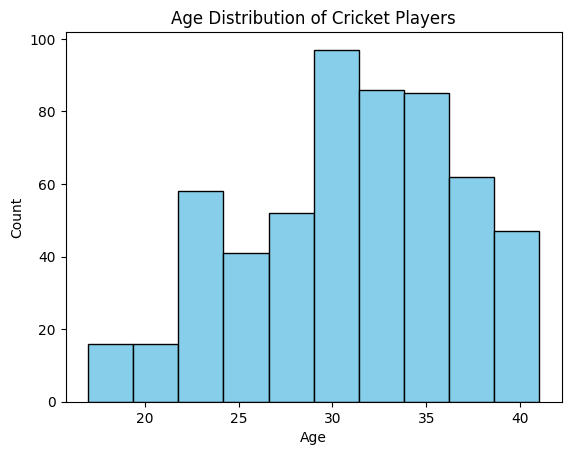

In [55]:
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Cricket Players')
plt.show()

# Batting Style Distribution

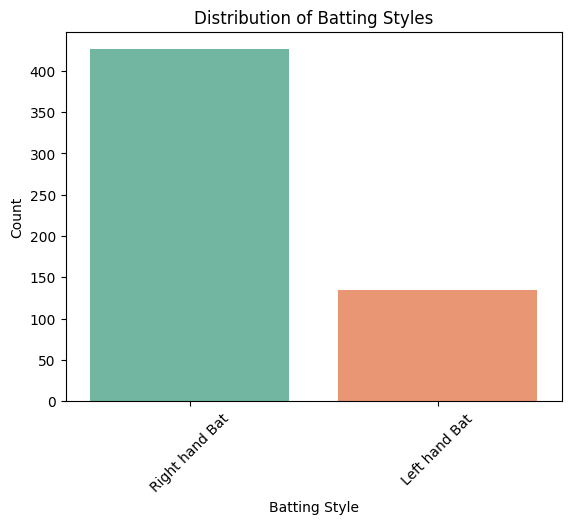

In [56]:
sns.countplot(x='Batting Style', data=data, palette='Set2')
plt.xlabel('Batting Style')
plt.ylabel('Count')
plt.title('Distribution of Batting Styles')
plt.xticks(rotation=45)
plt.show()

# Bowling Style Distribution

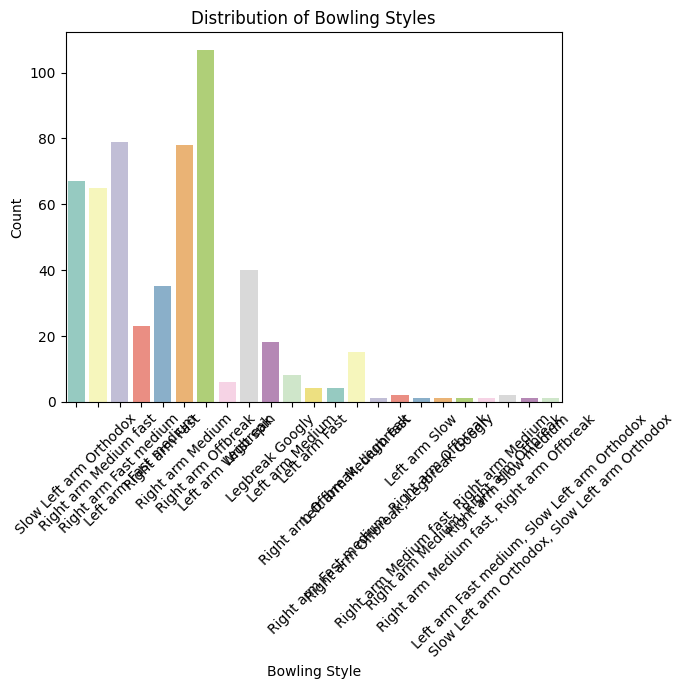

In [57]:
sns.countplot(x='Bowling Style', data=data, palette='Set3')
plt.xlabel('Bowling Style')
plt.ylabel('Count')
plt.title('Distribution of Bowling Styles')
plt.xticks(rotation=45)
plt.show()

# Playing Role Distribution

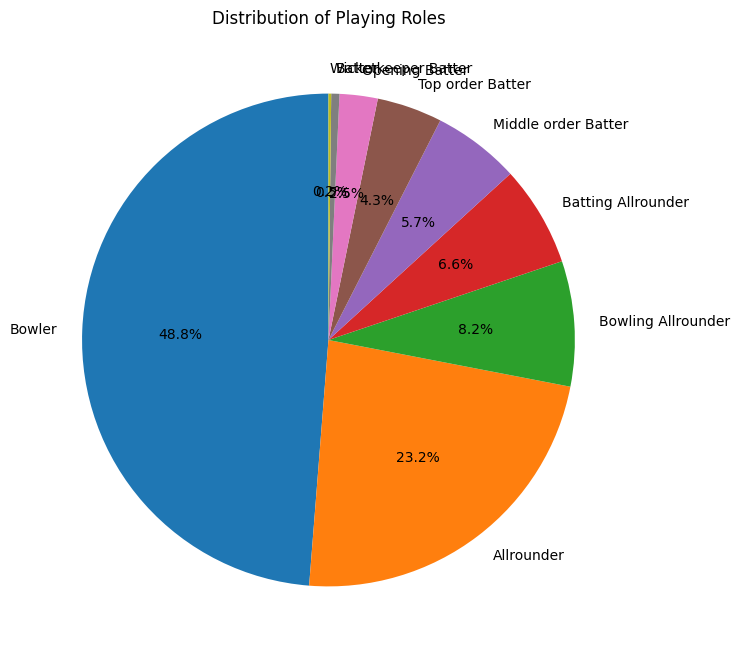

In [58]:
plt.figure(figsize=(8, 8))
data['Playing Role'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Playing Roles')
plt.ylabel('')
plt.show()

# Matches Won vs. Matches Lost

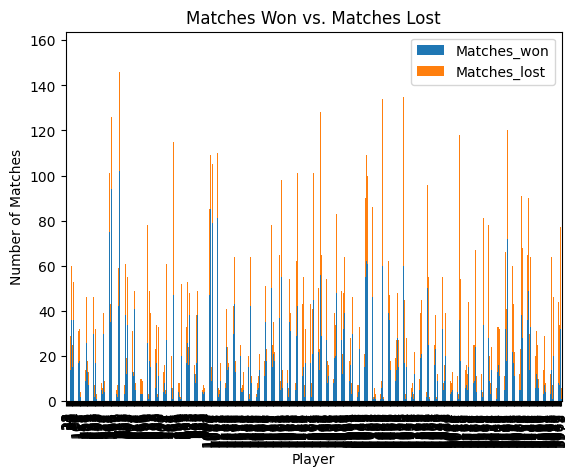

In [59]:
data[['Matches_won', 'Matches_lost']].plot(kind='bar', stacked=True)
plt.xlabel('Player')
plt.ylabel('Number of Matches')
plt.title('Matches Won vs. Matches Lost')
plt.show()

# Career Span Distribution

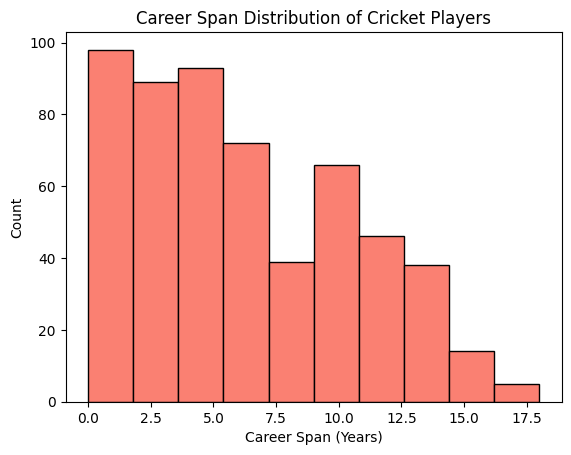

In [60]:
plt.hist(data['career_span_yrs'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Career Span (Years)')
plt.ylabel('Count')
plt.title('Career Span Distribution of Cricket Players')
plt.show()

# Runs vs. Wickets

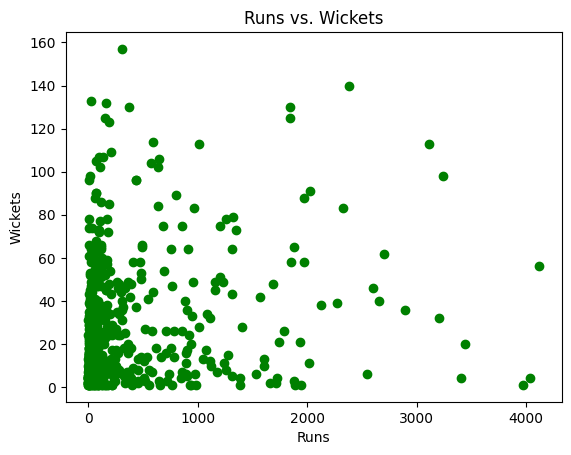

In [61]:
plt.scatter(data['Runs'], data['Wkts'], color='green')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Runs vs. Wickets')
plt.show()

# Batting Average vs. Bowling Average

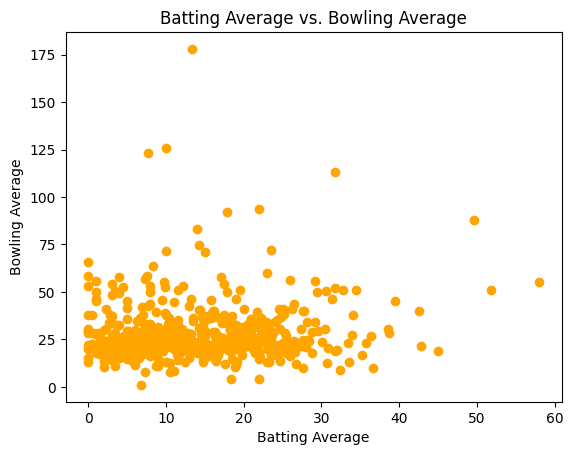

In [62]:
plt.scatter(data['Bat Avg'], data['Bowl Avg'], color='orange')
plt.xlabel('Batting Average')
plt.ylabel('Bowling Average')
plt.title('Batting Average vs. Bowling Average')
plt.show()

# Matches Played vs. Age

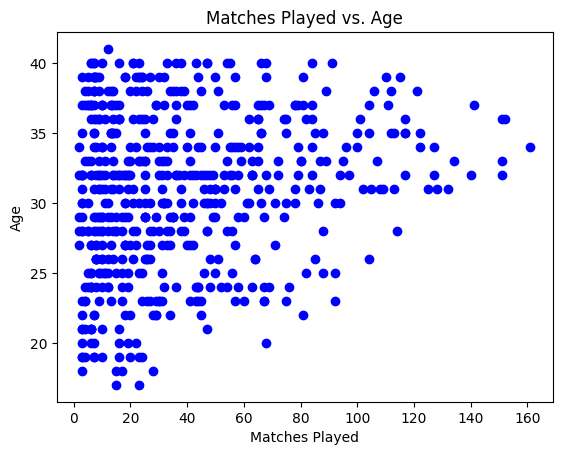

In [64]:
plt.scatter(data['Mat'], data['Age'], color='blue')
plt.xlabel('Matches Played')
plt.ylabel('Age')
plt.title('Matches Played vs. Age')
plt.show()

# Teams Playing Distribution

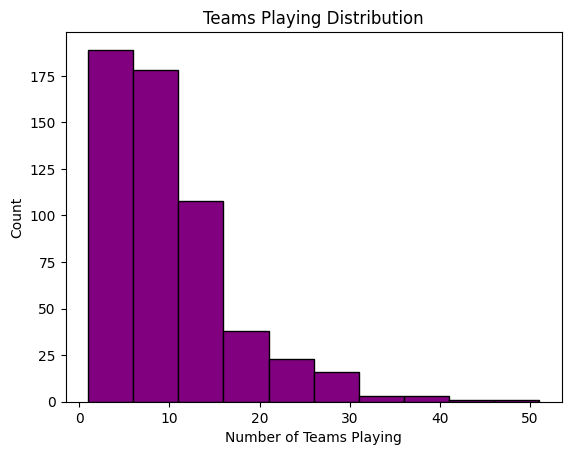

In [65]:
plt.hist(data['Teams_playing'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Number of Teams Playing')
plt.ylabel('Count')
plt.title('Teams Playing Distribution')
plt.show()